In [13]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

#### Plotting parameters

In [14]:
params = {'legend.fontsize': 20,
          'figure.figsize': (11.5, 10.5),
          'axes.labelsize': 27,
          'axes.titlesize': 23,
          'xtick.labelsize': 27,
          'ytick.labelsize': 27,
          'image.cmap': 'jet',
          'lines.linewidth': 1,
          'lines.markersize': 5,
          'font.family': 'sans-serif'}

plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)

#### 1) Load the data
a) Give the paths to the data in /afs/.

b) Load the values of the transverse emittance in a dictionary.

In [15]:
n_runs = 10 # number of runs that the simulation was repeated
turns = 1e5
f_rev = 43375.86 # [Hz] The revolution frequency of the machine 

In [50]:
# Noise parameters
type_of_noise = 'PN'
rms_ksi_list = [0.08, 0.2]
peak= 0.18
# tune spread
delta_rms = 2.1e-4
myDQ_min = -5*delta_rms
myDQ_max = 5*delta_rms
N_size = 10
tune_spread_list = np.linspace(myDQ_min, myDQ_max, N_size)
my_index = 2
tune_spreads = [tune_spread_list[my_index]]

In [51]:
path_to_data = '/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/'
name_template = 'tbt_'

In [52]:
ex_dict = {} # type: dictionary
ey_dict = {}
for rms_ksi in rms_ksi_list:
    for tune_spread in tune_spreads:
        for run in range(n_runs):
            temp_name = 'DQ{}_rmsKsi{}_run{}'.format(tune_spread, rms_ksi, run) # the suffix of the name of the current study
            # A. load the turn by turn data in a dictionary
            temp_dict = pickle.load( open( path_to_data+'rmsKsi{}_DQ{}/'.format(rms_ksi, my_index)+name_template+'{}.pkl'.format(run), "rb" ) )
            print(path_to_data+'rmsKsi{}_DQ{}/'.format(rms_ksi, my_index)+name_template+'{}.pkl'.format(run))
            # B. Create a different list for each run and save the emittance values
            ex_dict[temp_name] = temp_dict['neps_x'] 
            ey_dict[temp_name] = temp_dict['neps_y']

/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_0.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_1.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_2.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_3.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_4.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_5.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_6.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_scheme/output/rmsKsi0.08_DQ2/tbt_7.pkl
/afs/cern.ch/work/n/natriant/private/sixtracklib_example_crabcavity/two_CCs_sche

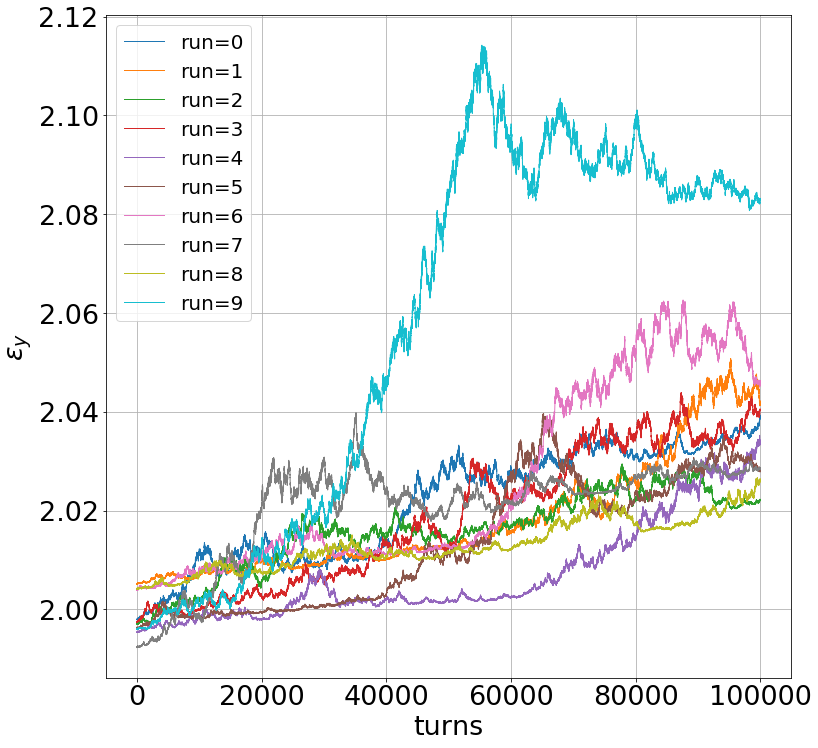

In [53]:
rms_ksi = rms_ksi_list[1]
for run in range(n_runs):
    plt.plot(np.array(ey_dict['DQ{}_rmsKsi{}_run{}'.format(tune_spread, rms_ksi, run)])*1e6, label='run={}'.format(run))
plt.legend(loc=0)
plt.xlabel('turns')
plt.ylabel(r'$\epsilon_y$')
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('ey_DQy{}_rmsKsi{}.png'.format(tune_spread, rms_ksi))

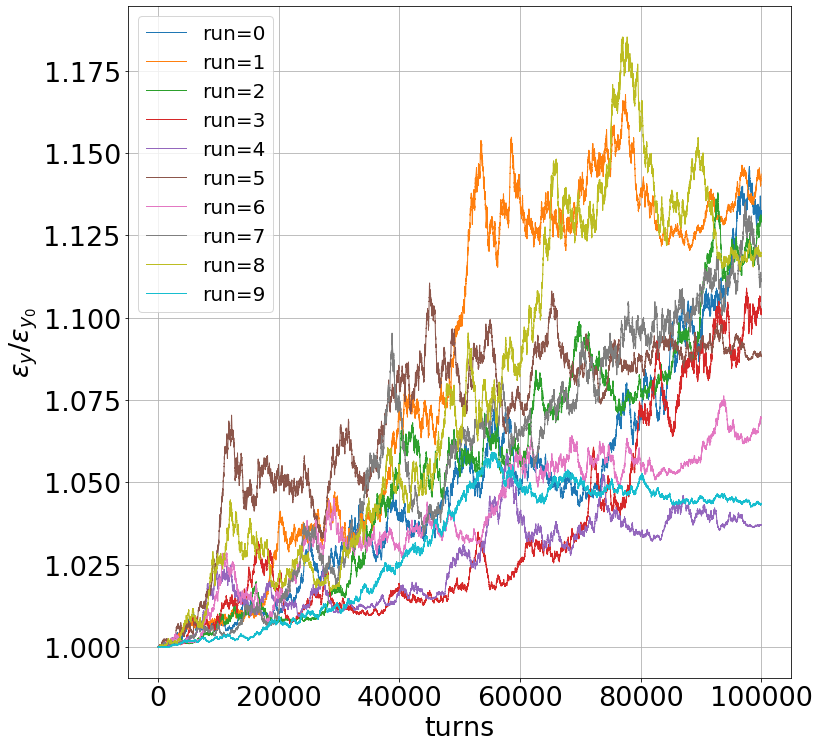

In [54]:
rms_ksi = rms_ksi_list[0]
for run in range(n_runs):
    plt.plot(np.array(ey_dict['DQ{}_rmsKsi{}_run{}'.format(tune_spread, rms_ksi, run)])/ey_dict['DQ{}_rmsKsi{}_run{}'.format(tune_spread, rms_ksi, run)][0], label='run={}'.format(run))
plt.legend(loc=0)
plt.xlabel('turns')
plt.ylabel(r'$\epsilon_y / \epsilon_{y_0}$')
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('ey_rel_DQy{}_rmsKsi{}.png'.format(tune_spread, rms_ksi))

#### 2) Here the mean and the standard deviation of the emittance values are computed over all runs. 

In [55]:
ex_mean = {}
ey_mean = {}

ex_std = {}
ey_std = {}

for rms_ksi in rms_ksi_list:
    for tune_spread in tune_spreads:
        ex_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)] = []
        ey_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)] = []
        ex_std['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)] = []
        ey_std['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)] = []
        #print(tune_spread)
        for turn in range(int(turns)):
            ex_temp = []
            ey_temp = []

            # keep all the emittance values for all the runs
            for run in range(n_runs):
                temp_name = 'DQ{}_rmsKsi{}_run{}'.format(tune_spread, rms_ksi, run)
                ex_temp.append(ex_dict[temp_name][turn])
                ey_temp.append(ey_dict[temp_name][turn])
            # calculate and append the mean of the emittance value for every turn
            ex_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)].append(np.mean(ex_temp))
            ey_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)].append(np.mean(ey_temp))
            # calculate and append the standard deviation of the emittance value for every turn
            ex_std['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)].append(np.std(ex_temp))
            ey_std['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)].append(np.std(ey_temp))    

#### 3) Convert turn to time [s]

In [56]:
turns_list = np.arange(0,turns)
time = turns_list/f_rev # [s], type: list

#### 4) Plot evolution of the H (horizontal emittance) emittancae, for an example case

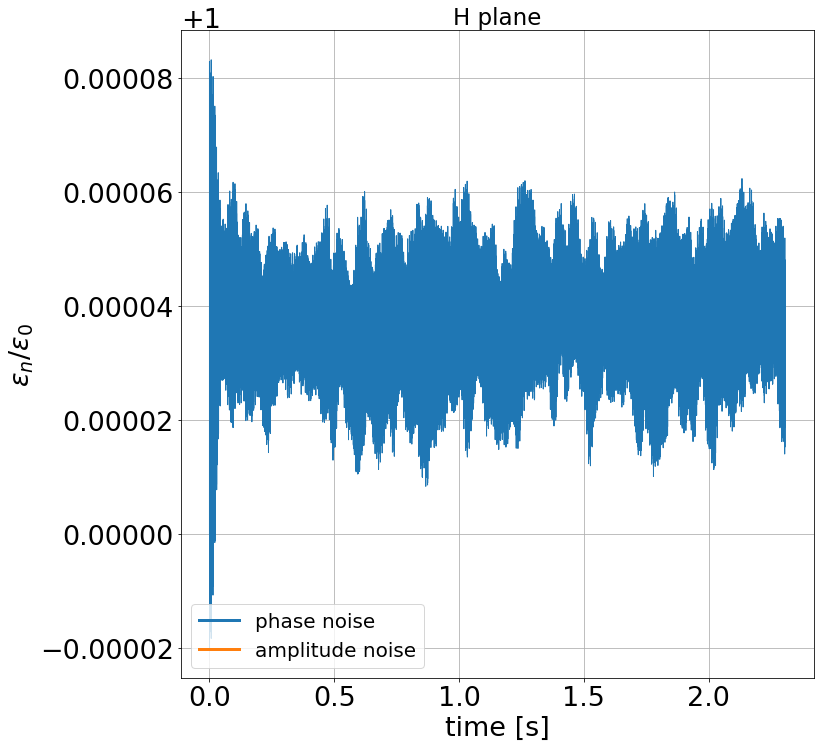

In [57]:
tune_spread = tune_spreads[0]
rms_ksi = rms_ksi_list[0]
plt.plot(time, ex_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)]/ex_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)][0], c='C0')
plt.plot(1,1,c='C0',  label = 'phase noise', linewidth = 3)    
plt.plot(1,1,c='C1',  label = 'amplitude noise', linewidth = 3)    
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_n / \epsilon_0$')
plt.title('H plane')
plt.legend(loc=3)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('H_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 5) Plot evolution of the V (vertical emittance) emittance, for an example case

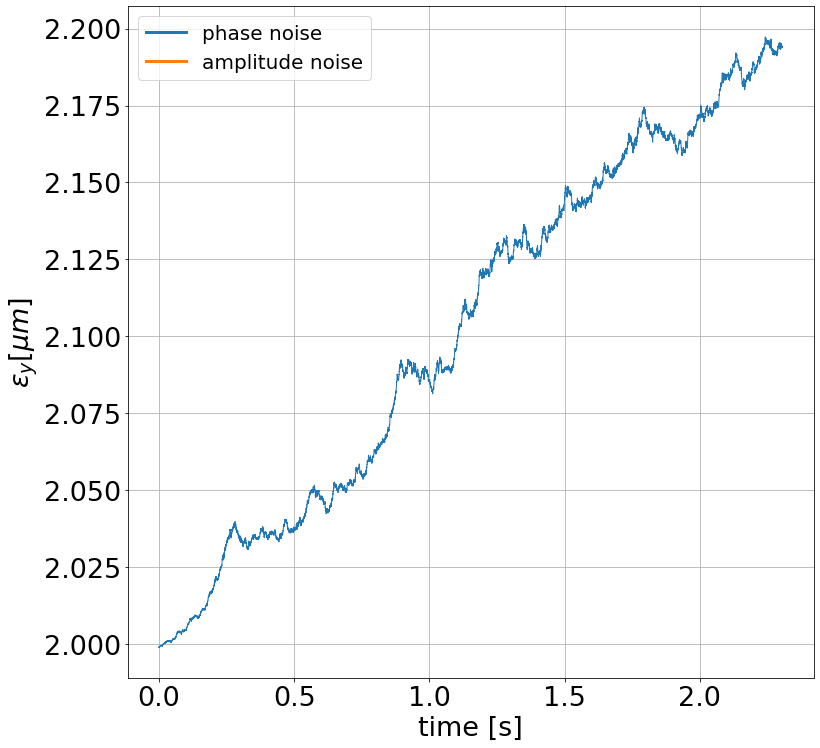

In [60]:
tune_spread = tune_spreads[0]
rms_ksi = rms_ksi_list[0]
plt.plot(time, np.array(ey_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)])*1e6, c='C0')    
plt.plot(2,2,c='C0',  label = 'phase noise', linewidth = 3)    
plt.plot(2,2,c='C1',  label = 'amplitude noise', linewidth = 3)    
plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 6) Plot evolution of the standard deviation $\sigma$ of the emittance values (in the vertical plane), for an example case

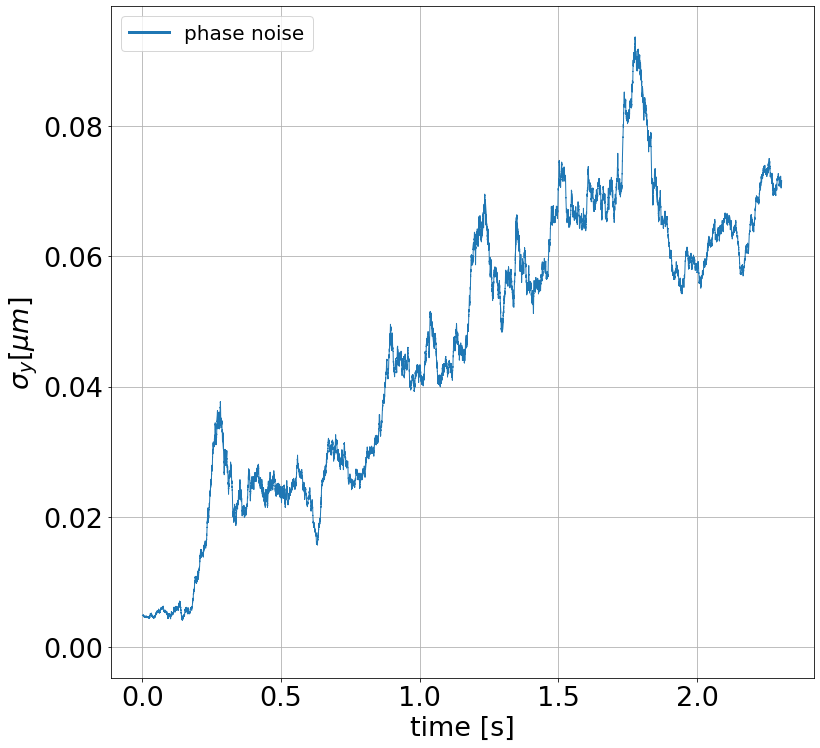

In [61]:
tune_spread = tune_spreads[0]
rms_ksi = rms_ksi_list[0]
plt.plot(time, np.array(ey_std['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)])*1e6, c='C0')   
plt.plot(0,0,c='C0',  label = 'phase noise', linewidth = 3)   
plt.xlabel('time [s]')
plt.ylabel(r'$\sigma_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_std_270GeV_SPS_noCC_PN1e-8_VRF2_37MV_1e5Nb_1e5turns_mean10runs.png')

#### 7) Compute the emittance growth rate via a linear fit
- Polynomial fit. The degree of the fitting polynomial is 1. 
- V plane only

In [62]:
m_dict = {}
b_dict = {} 
err_dict = {}

for rms_ksi in rms_ksi_list:
    m_dict['rmsKsi{}'.format(rms_ksi)] = []
    b_dict['rmsKsi{}'.format(rms_ksi)] = []
    err_dict['rmsKsi{}'.format(rms_ksi)] = []
    
    for tune_spread in tune_spreads:
        # linear fit
        [m_temp, b_temp], cov_temp = np.polyfit(time, ey_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)], 1, cov=True)
        m_dict['rmsKsi{}'.format(rms_ksi)].append(m_temp)
        b_dict['rmsKsi{}'.format(rms_ksi)].append(b_temp)
        # compute the error of the gradient of the fit slope
        err_dict['rmsKsi{}'.format(rms_ksi)].append(np.sqrt(np.diag(cov_temp)))

#### Plot the fit for an example case of tune spread

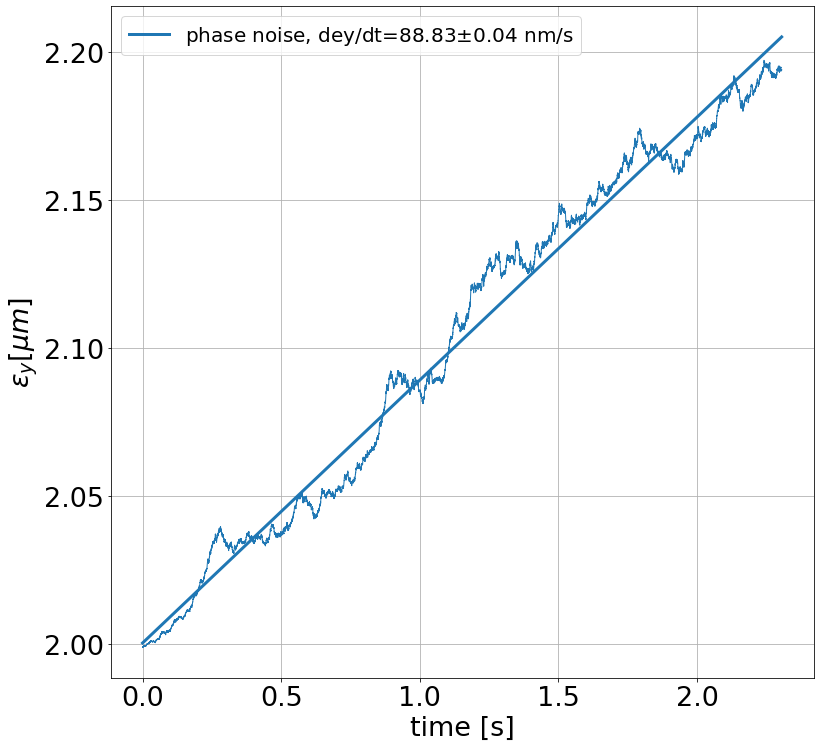

In [63]:
index = 0
tune_spread = tune_spreads[index]
rms_ksi = rms_ksi_list[0]

plt.plot(time, np.array(ey_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)])*1e6, c='C0')
plt.plot(time, (m_dict['rmsKsi{}'.format(rms_ksi)][index]*time+b_dict['rmsKsi{}'.format(rms_ksi)][index])*1e6, c = 'C0', label='phase noise, dey/dt={0:.2f}'.format(m_dict['rmsKsi{}'.format(rms_ksi)][index]*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_dict['rmsKsi{}'.format(rms_ksi)][index][0]*1e9), linewidth = 3)

plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}runs.png'.format(type_of_noise, n_runs))

In [64]:
my_colors = ['C0', 'C1']
fill_bewtween_color = ['lightblue', 'moccasin']

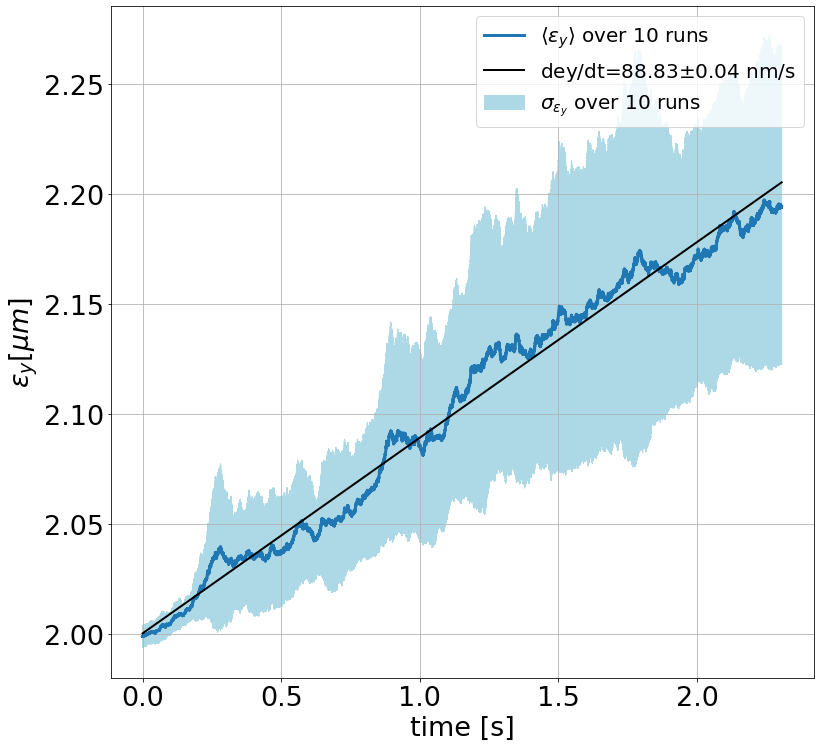

In [65]:
index = 0
tune_spread = tune_spreads[index]
rms_ksi = rms_ksi_list[0]

ey_mean_array = np.array(ey_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)])
ey_std_array = np.array(ey_std['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)])
m_array = np.array(m_dict['rmsKsi{}'.format(rms_ksi)][index])
b_array = np.array(b_dict['rmsKsi{}'.format(rms_ksi)][index])
err_array = np.array(err_dict['rmsKsi{}'.format(rms_ksi)][index])

# std over all runs
plt.fill_between(time, ey_mean_array*1e6 - ey_std_array*1e6, ey_mean_array*1e6 + ey_std_array*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y}$'+ ' over {} runs'.format(n_runs))

# emittance values obtained from the simulation averaged over turns
plt.plot(time, np.array(ey_mean_array)*1e6, c=my_colors[index], linewidth=3, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

# linear fit on the emittance values obtained from the simulation averaged over turns
plt.plot(time, (m_array*time+b_array)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m_array*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_array[0]*1e9), linewidth = 2)



plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
#plt.ylim(1.98, 2.10)
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}run_fill_between_v2.png'.format(type_of_noise, n_runs))

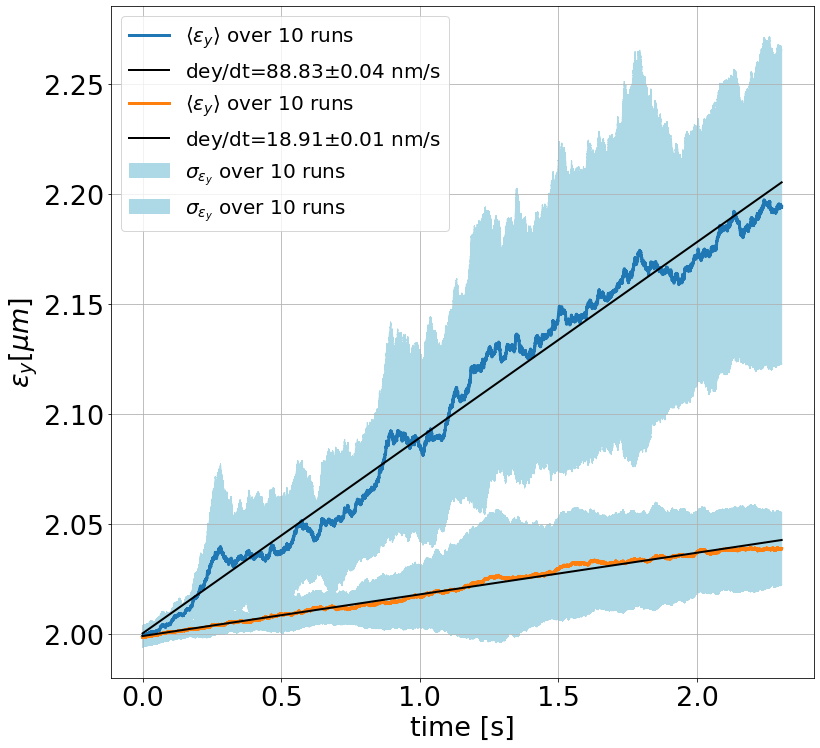

In [66]:
index = 0
tune_spread = tune_spreads[index]
rms_ksi = rms_ksi_list[0]


for index, rms_ksi in enumerate(rms_ksi_list):
    ey_mean_array = np.array(ey_mean['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)])
    ey_std_array = np.array(ey_std['DQ{}_rmsKsi{}'.format(tune_spread, rms_ksi)])
    m_array = np.array(m_dict['rmsKsi{}'.format(rms_ksi)][0])
    b_array = np.array(b_dict['rmsKsi{}'.format(rms_ksi)][0])
    err_array = np.array(err_dict['rmsKsi{}'.format(rms_ksi)][0])

    # std over all runs
    plt.fill_between(time, ey_mean_array*1e6 - ey_std_array*1e6, ey_mean_array*1e6 + ey_std_array*1e6, color=fill_bewtween_color, label=r'$\sigma_{\epsilon_y}$'+ ' over {} runs'.format(n_runs))

    # emittance values obtained from the simulation averaged over turns
    plt.plot(time, np.array(ey_mean_array)*1e6, c=my_colors[index], linewidth=3, label=r'$\langle \epsilon_y \rangle $'+' over {} runs'.format(n_runs))

    # linear fit on the emittance values obtained from the simulation averaged over turns
    plt.plot(time, (m_array*time+b_array)*1e6, c = 'k', label='dey/dt={0:.2f}'.format(m_array*1e9)+'$\pm$'+'{0:.2f} nm/s'.format(err_array[0]*1e9), linewidth = 2)



plt.xlabel('time [s]')
plt.ylabel(r'$\epsilon_y [\mu m]$')
plt.legend(loc=0)
plt.grid()
#plt.ylim(1.98, 2.10)
plt.tight_layout()
savefig = False
if savefig:
    plt.savefig('V_emittance_growth_rate_270GeV_SPS_noCC_{}1e-8_VRF2_37MV_1e5Nb_1e5turns_mean{}run_fill_between_v2.png'.format(type_of_noise, n_runs))

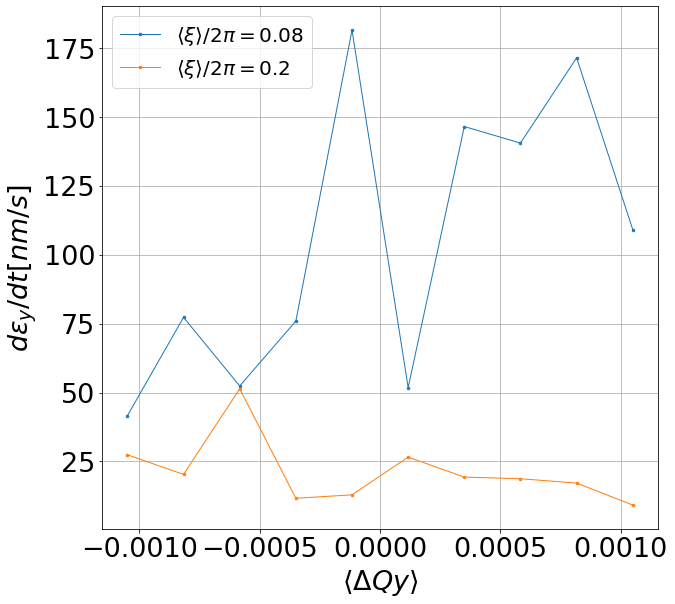

In [63]:
for rms_ksi in rms_ksi_list:
    plt.plot(tune_spreads, np.array(m_dict['rmsKsi{}'.format(rms_ksi)])*1e9, '.-', label=r'$\langle \xi \rangle  / 2 \pi = {} $'.format(rms_ksi))

plt.xlabel(r'$\langle \Delta Qy \rangle$')
plt.ylabel(r'$d\epsilon_y /dt [nm/s]$')
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('emit_growth_vs_DQy_vs_rmsKsi.png')